In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank_shorter_data.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [4]:
df["y"] = df["y"].map({'yes': 1, 'no': 0})
df["default"] = df["default"].map({'yes': 1, 'no': 0})
df["housing"] = df["housing"].map({'yes': 1, 'no': 0})
df["loan"] = df["loan"].map({'yes': 1, 'no': 0})
df["contact"] = df["contact"].map({'telephone': 1, 'cellular': 0})
df.pdays.replace(to_replace=999, value=np.nan, inplace=True)

In [5]:
for i in df.columns:
    if df[i].dtype != df["default"].dtype:
        print(i, "column named has the unique values of: ", df[i].unique())

job column named has the unique values of:  ['admin.' 'services' 'management' 'blue-collar' 'technician' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
marital column named has the unique values of:  ['married' 'single' 'divorced']
education column named has the unique values of:  ['tertiary' 'secondary' 'primary']
month column named has the unique values of:  ['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
poutcome column named has the unique values of:  ['failure' 'other' 'success']


In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,0,882,0,0,1,21,oct,39,1,151,3,failure,0
1,42,admin.,single,secondary,0,-247,1,1,1,21,oct,519,1,166,1,other,1
2,33,services,married,secondary,0,3444,1,0,1,21,oct,144,1,91,4,failure,1
3,36,management,married,tertiary,0,2415,1,0,1,22,oct,73,1,86,4,other,0
4,36,management,married,tertiary,0,0,1,0,1,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,0,1475,1,0,0,16,nov,1166,3,530,12,other,0
7838,53,management,married,tertiary,0,583,0,0,0,17,nov,226,1,184,4,success,1
7839,73,retired,married,secondary,0,2850,0,0,0,17,nov,300,1,40,8,failure,1
7840,72,retired,married,secondary,0,5715,0,0,0,17,nov,1127,5,184,3,success,1


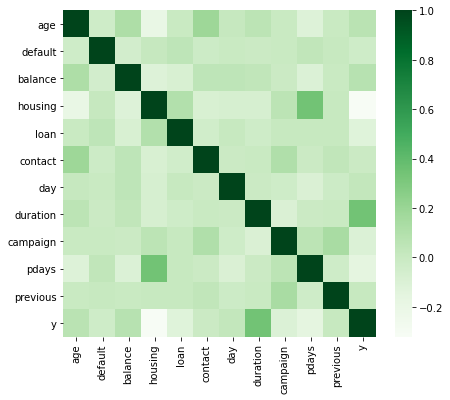

In [7]:
corr = df.corr()

plt.figure(figsize=(7,6))
_ = sns.heatmap(corr.round(2), cmap="Greens")

In [8]:
corr.round(2)

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
age,1.00,-0.03,0.12,-0.19,-0.00,0.19,0.02,0.06,0.00,-0.11,0.00,0.07
default,-0.03,1.00,-0.05,0.02,0.05,-0.02,-0.00,-0.01,-0.00,0.04,0.01,-0.03
balance,0.12,-0.05,1.00,-0.11,-0.08,0.05,0.05,0.04,-0.01,-0.10,0.00,0.08
housing,-0.19,0.02,-0.11,1.00,0.10,-0.08,-0.07,-0.07,0.06,0.35,0.01,-0.32
loan,-0.00,0.05,-0.08,0.10,1.00,-0.04,0.01,-0.03,0.01,0.01,0.01,-0.12
contact,0.19,-0.02,0.05,-0.08,-0.04,1.00,-0.01,-0.00,0.11,-0.01,0.04,-0.01
day,0.02,-0.00,0.05,-0.07,0.01,-0.01,1.00,-0.01,-0.03,-0.09,-0.02,0.03
duration,0.06,-0.01,0.04,-0.07,-0.03,-0.00,-0.01,1.00,-0.09,-0.01,-0.00,0.35
campaign,0.00,-0.00,-0.01,0.06,0.01,0.11,-0.03,-0.09,1.00,0.06,0.14,-0.10
pdays,-0.11,0.04,-0.10,0.35,0.01,-0.01,-0.09,-0.01,0.06,1.00,-0.03,-0.15


In [9]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        7842 non-null   int64   
 1   job        7842 non-null   category
 2   marital    7842 non-null   category
 3   education  7842 non-null   category
 4   default    7842 non-null   category
 5   balance    7842 non-null   int64   
 6   housing    7842 non-null   category
 7   loan       7842 non-null   category
 8   contact    7842 non-null   category
 9   day        7842 non-null   int64   
 10  month      7842 non-null   category
 11  duration   7842 non-null   int64   
 12  campaign   7842 non-null   int64   
 13  pdays      7842 non-null   int64   
 14  previous   7842 non-null   int64   
 15  poutcome   7842 non-null   category
 16  y          7842 non-null   int64   
dtypes: category(9), int64(8)
memory usage: 560.8 KB


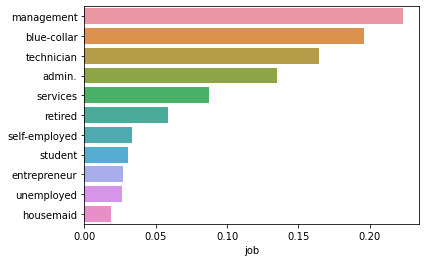

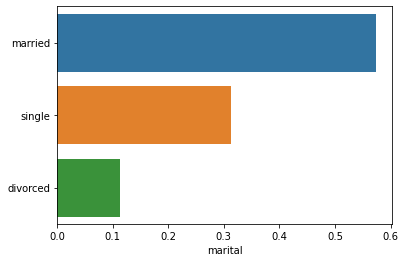

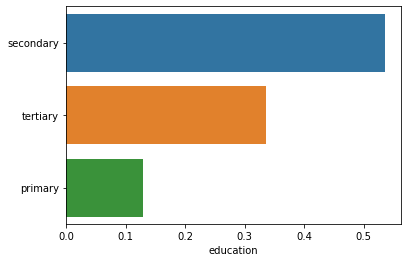

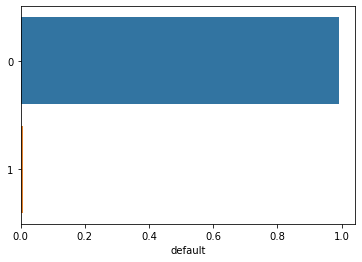

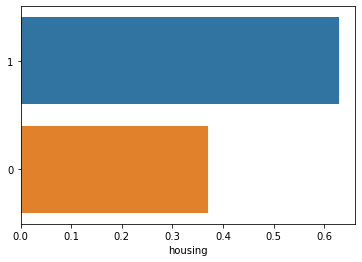

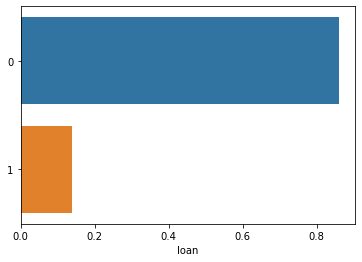

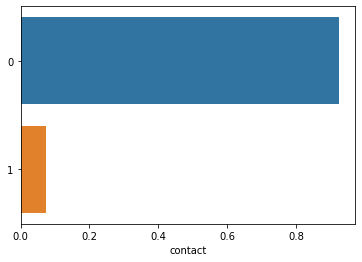

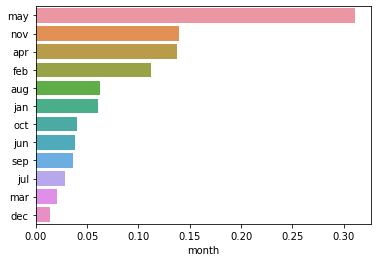

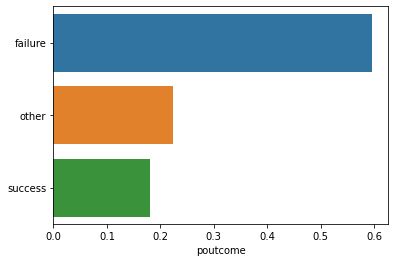

In [10]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    value_percentages = df[feature].value_counts(normalize=True, sort=True)
    sns.barplot(x=value_percentages, y=value_percentages.index, orient='h', order=value_percentages.index)
    plt.show()

In [11]:
import sklearn
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [18]:
y= df["y"]

In [20]:
x= df.drop("y",axis = 1)

In [22]:
x_dummied = pd.get_dummies(x)

In [23]:
x_scaled = scaler.fit_transform(x_dummied)

In [24]:
x_scaled

array([[0.21126761, 0.03329001, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.33802817, 0.019702  , 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.21126761, 0.06412478, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.77464789, 0.05697574, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.76056338, 0.09145725, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.26760563, 0.05843202, 0.53333333, ..., 0.        , 1.        ,
        0.        ]])